In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
stop final relax at some point
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info    : Function properties fo

In [2]:
%load_ext pyinstrument

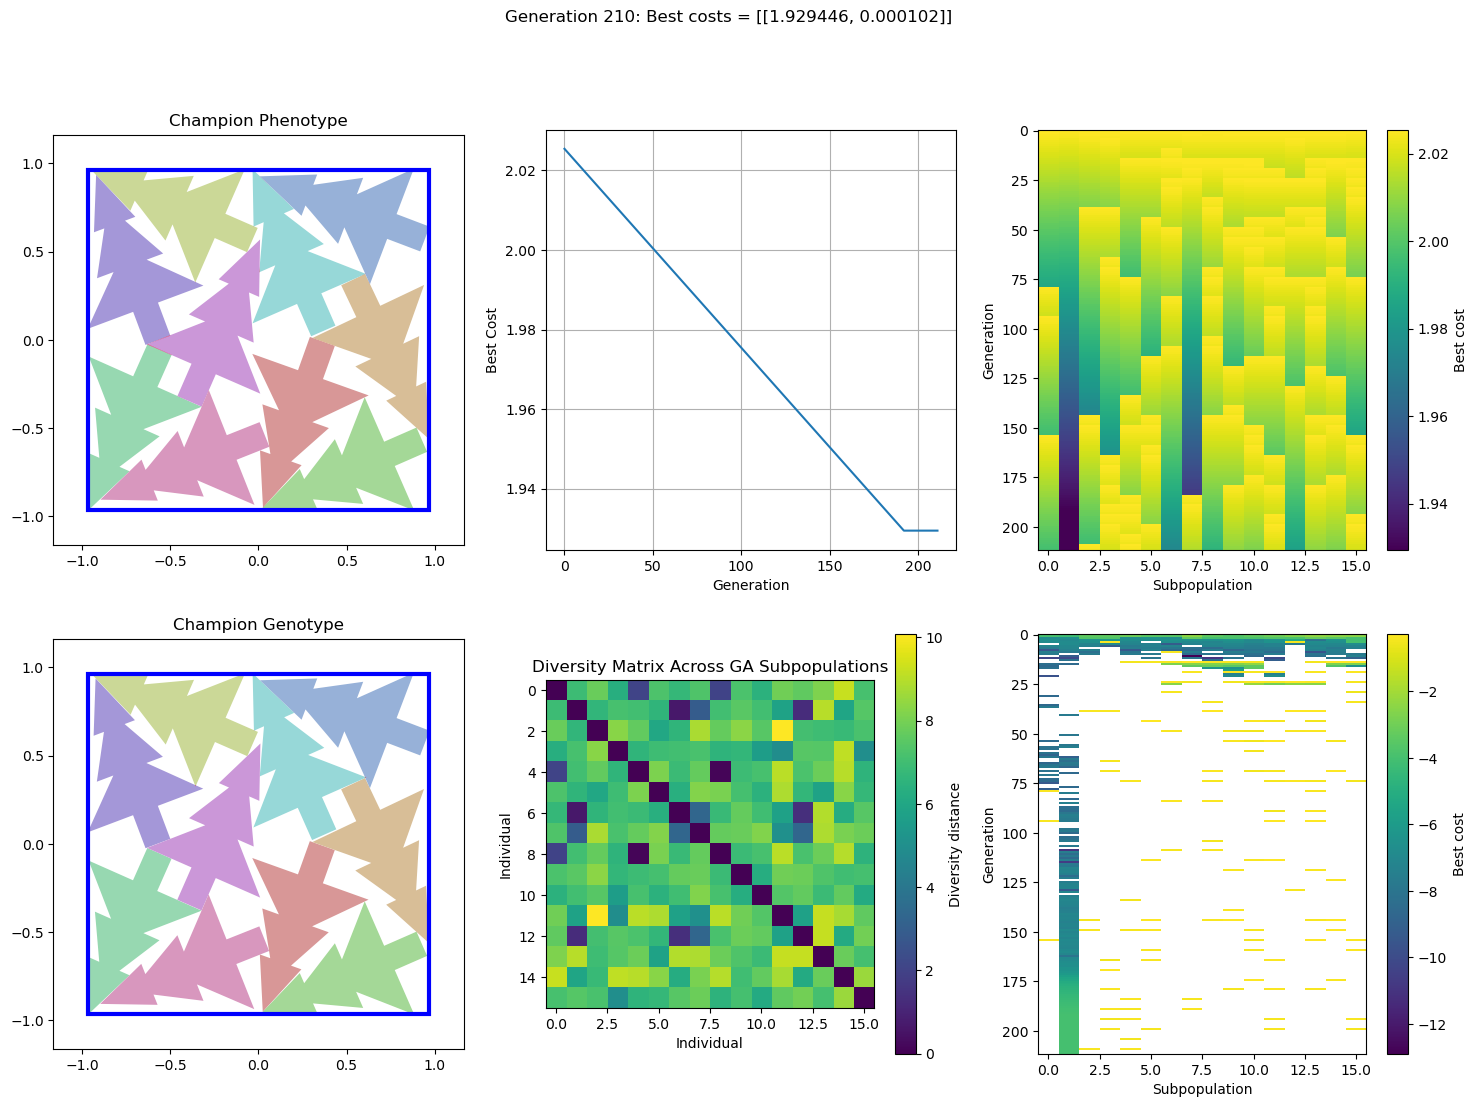

KeyboardInterrupt: 

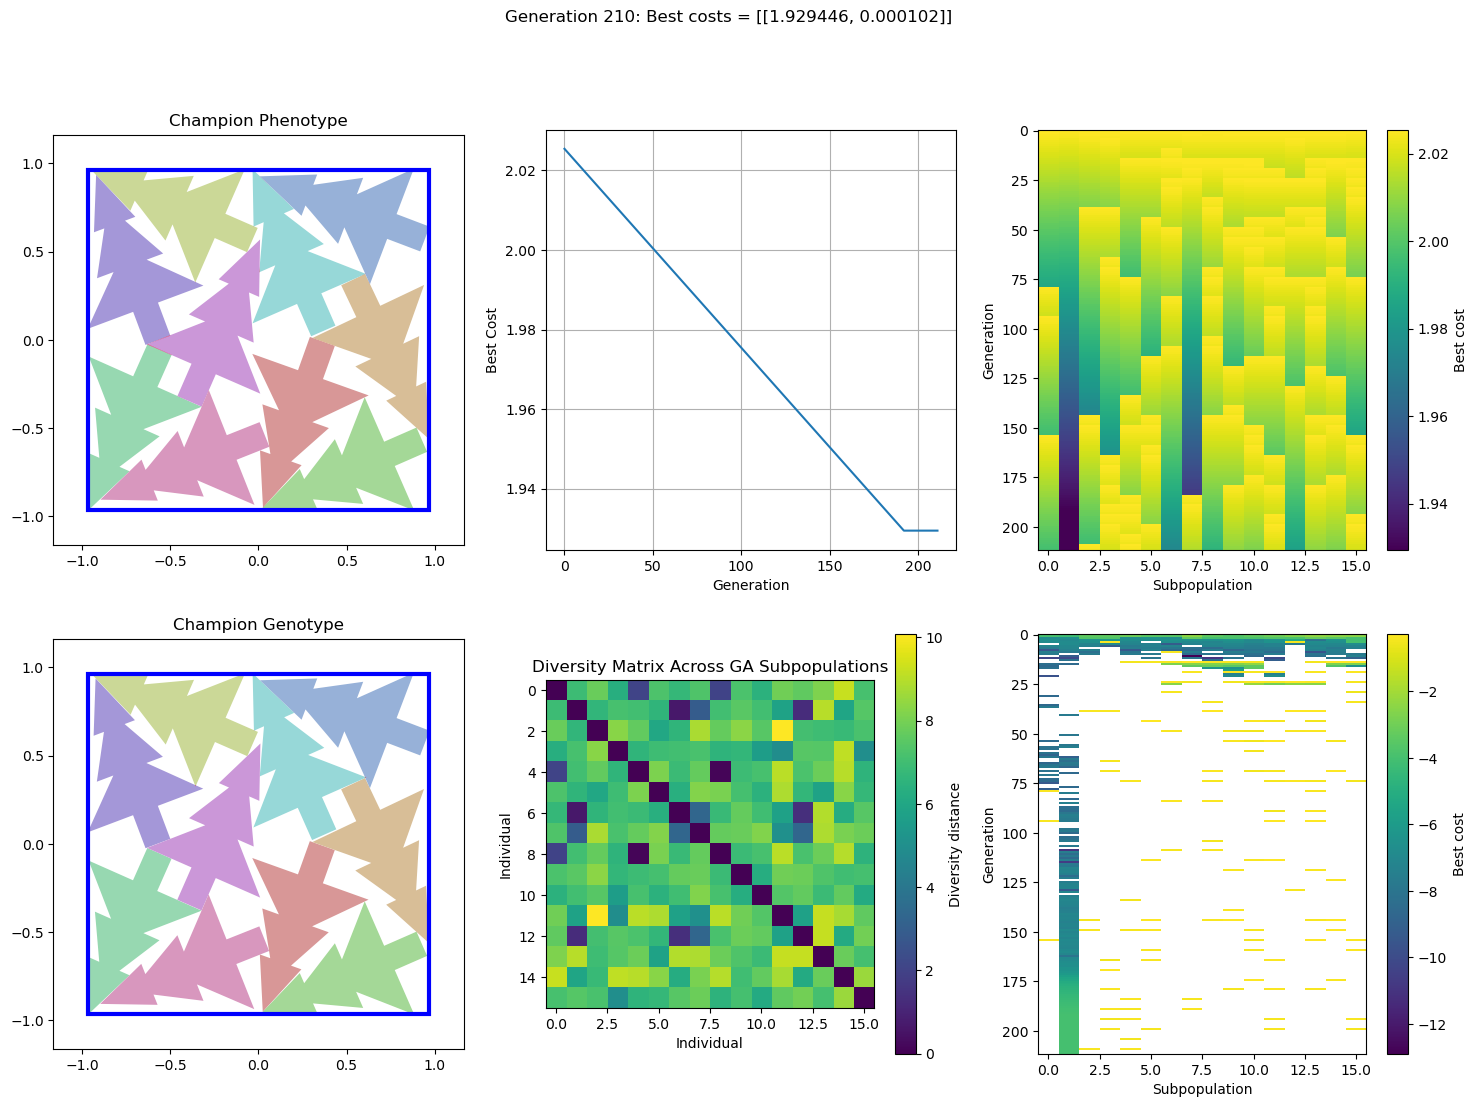

In [3]:
# %%pyinstrument
# kgs.profiling=True
# %matplotlib widget
import pack_ga3 as pack_ga2
import pack_runner
importlib.reload(pack_ga2)
fastMode = False
kgs.debugging_mode = 2

tmp = pack_ga2.GA()

runner = pack_ga2.Orchestrator(n_generations=500 if not fastMode else 50)
runner.ga = pack_ga2.GAMultiRing(N=16 if not fastMode else 4)
runner.ga.diversity_reset_threshold = 5./40
runner.ga.mate_distance=6

ga_base = pack_ga2.GASinglePopulationOld(N_trees_to_do=10)
#ga_base.population_size = 250
#ga_base.prob_mate_own = 0.25
value = 0.125
ga_base.population_size = int(ga_base.population_size * value)
ga_base.selection_size = [int( (s-1) * value)+1 for s in ga_base.selection_size]
ga_base.do_legalize = False
ga_base.reset_check_generations = 50 if not fastMode else 3
ga_base.reset_check_threshold = 0.5 if not fastMode else 0.9
ga_base.freeze_duration = 100 if not fastMode else 3
#ga_base.move.moves[-1][2] *= 2
ga_base.prob_mate_own = 0.7
ga_base.reduce_h_threshold = 1e-4
ga_base.selection_size = ga_base.selection_size[:-6]
ga_base.fixed_h*=1.05
ga_base.reduce_h_amount/=4

runner.ga.ga_base = ga_base
runner.ga.do_legalize = not fastMode
runner.ga.allow_reset_ratio = 0.5 if not fastMode else 0.
runner.ga.best_costs_per_generation_ax = ((0,False,(0,1)),)#( (0,False,(0,0)) ,(1,True,(0,1)))
runner.ga.plot_subpopulation_costs_per_generation_ax = ( (0,False,(0,2)) ,(1,True,(1,2)))
runner.ga.champion_genotype_ax = (1,0)
runner.ga.champion_phenotype_ax = (0,0)
runner.ga.plot_diversity_ax = (1,1)
runner.diagnostic_plot = True
runner.seed = 0

runner.run()

In [4]:
runner.ga.do_legalize = True
runner.ga.finalize()

Before optimization:  0.03733734041452408 0.00010973234748234972 1.9294457
After optimization:  0.03732152283191681 0.00010985044355038553 1.9290328
After optimization:  0.03745756670832634 2.9494402042473666e-05 1.9346336
After optimization:  0.03755157068371773 7.961123628774658e-06 1.9376174
After optimization:  0.03760935366153717 1.9070175767410547e-06 1.9392639
After optimization:  0.03763828054070473 4.990015440853313e-07 1.940046
After optimization:  0.03765386343002319 1.250387526852137e-07 1.9404571
After optimization:  0.03766161575913429 3.617012467316272e-08 1.9406592
After optimization:  0.03766603395342827 1.1215440132161802e-08 1.9407736
After optimization:  0.03766742721199989 7.149432601494254e-09 1.9408096
After optimization:  0.037669673562049866 2.3150181771569578e-09 1.9408677
After optimization:  0.03767041489481926 1.1334847505040102e-09 1.9408869
After optimization:  0.03767111897468567 4.754339144596997e-10 1.940905
After optimization:  0.03767156973481178 2.0

<Axes: >

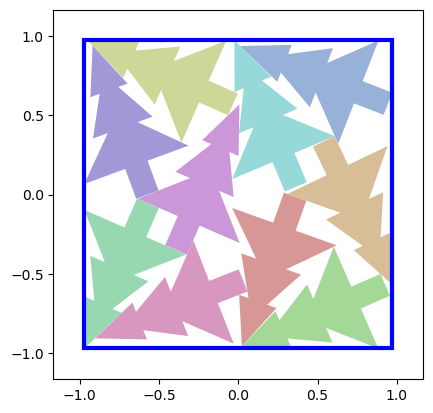

In [5]:
import pack_vis_sol
pack_vis_sol.pack_vis_sol(runner.ga.champions[0].phenotype)

In [6]:
import pack_io
pack_io.solution_list_to_dataframe([runner.ga.champions[0].phenotype], compact=True)

Score of generated dataframe: 0.3767069761882042


,id,x,y,deg
0,010_0,s0.29100765902999515,s-0.20236659316093997,s-1279.59033203125
1,010_1,s0.6251338200394951,s0.1544399822623079,s-1954.432373046875
2,010_2,s-0.21673250813987563,s0.649020959211891,s-1733.7210693359375
3,010_3,s0.7424482146821922,s-0.6492323144836969,s-966.3699340820312
4,010_4,s-0.6487880869482289,s-0.23745925717809624,s-1283.696533203125
5,010_5,s0.2852582711229441,s0.23288171087322826,s-2137.29345703125
6,010_6,s0.7570116419374807,s0.6448640671176181,s-1731.3333740234375
7,010_7,s-0.6418162835675545,s0.1873082601919959,s-2139.802001953125
8,010_8,s-0.31209958599025106,s-0.16557498084498024,s-23.512981414794922
9,010_9,s-0.15583358000909164,s-0.6141784525765084,s-1328.603271484375


In [ ]:
#kgs.dill_save(kgs.temp_dir+'to_legalize.pickle', runner.ga.champions[0].phenotype)